# Q1
Use the given code and modify for IRIS dataset. Implement the SVM classifier in Python (make use of scikit-learn library). Apply the linear kernel function. Plot the scatter plot of the input features. Plot the decision boundary.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

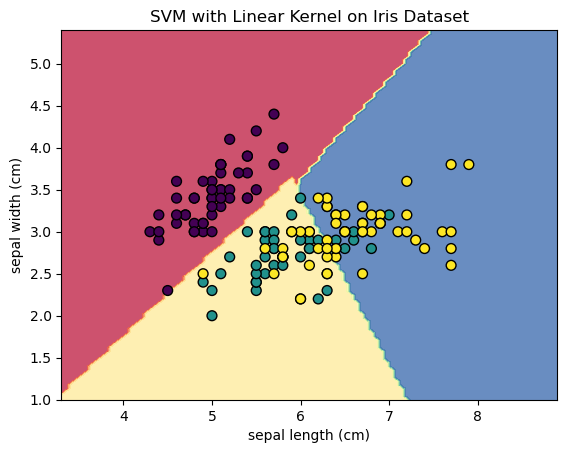

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
svm = SVC(kernel="linear", C=1.0)
svm.fit(X, y)

DecisionBoundaryDisplay.from_estimator(
    svm,
    X,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors="k")
plt.title("SVM with Linear Kernel on Iris Dataset")
plt.show()


# Q2
Construct a simple SVM classifier that separates the two classes:
Positively labeled data points: (4, 1), (4, -1), (6, 0)
Negatively labeled data points: (1, 0), (0, 1), (0, -1)

For all negatively labeled points, the output is -1, and for all positively labeled points, the output is 1.
Implement the python function program to draw the hyperplane that separates the two classes using scikit-learn library. Plot the scatter plot of the input features.

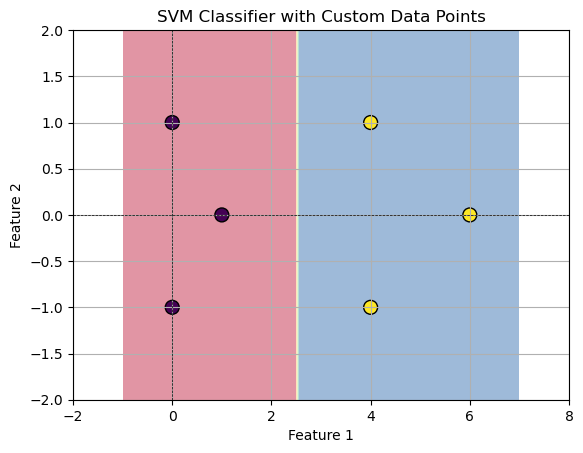

In [44]:
X = np.array([[4, 1], [4, -1], [6, 0], 
              [1, 0], [0, 1], [0, -1]])  
y = np.array([1, 1, 1, -1, -1, -1])  

svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

DecisionBoundaryDisplay.from_estimator(
    svm,
    X,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.5,
    xlabel='Feature 1',
    ylabel='Feature 2',
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors="k")
plt.title("SVM Classifier with Custom Data Points")
plt.xlim(-2, 8)
plt.ylim(-2, 2)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend
plt.show()


# Q3
Solve Qn (2) manually in your Observation book and implement without using scikit-learn library.

Slope: -0.0, Intercept: 0.0


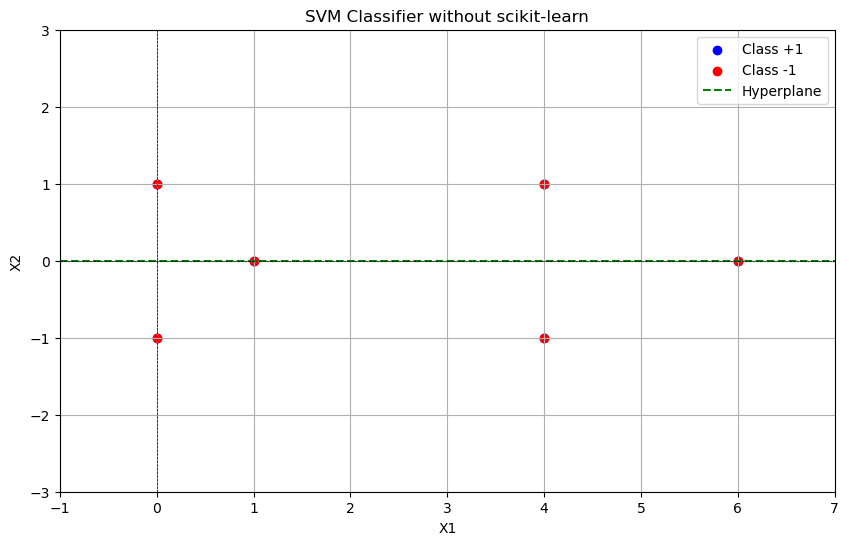

In [47]:
def calculate_hyperplane(X, y):
    pos = X[y == 1]
    neg = X[y == -1]
    
    p1 = pos[-1]
    p2 = neg[0]
    

    slope = (p2[1] - p1[1]) / (p2[0] - p1[0])
    intercept = p1[1] - slope * p1[0]
    
    return slope, intercept

slope, intercept = calculate_hyperplane(X, y)
print(f"Slope: {slope}, Intercept: {intercept}")

x_values = np.linspace(-1, 7, 100)
y_values = slope * x_values + intercept

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Class +1')
plt.scatter(X[:, 0], X[:, 1], color='red', label='Class -1')

plt.plot(x_values, y_values, color='green', linestyle='--', label='Hyperplane')

plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.title("SVM Classifier without scikit-learn")
plt.xlim(-1, 7)
plt.ylim(-3, 3)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.legend()
plt.show()


# Q4
Develop a Python function program to sketch the hyperplane 1 + 2X1 + 3X2 = 0 without using scikit-learn library.

Indicate the set of points for which 1 + 3X1 − X2 > 0, 1 + 3X1 − X2 < 0 and 1 + 3X1 − X2=0.\
Take x1, x2 ∈ (-10, 10). Plot the graph for every +/- 1 increment. Find the slope and intercept.\
Solve manually in your Observation book. Compare your results with manual results.

/tmp/ipykernel_4818/1777184389.py:14: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, hyperplane, levels=[0], linewidths=2, label=f'Hyperplane {i+1}: {hyperplane_eq} = 0')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


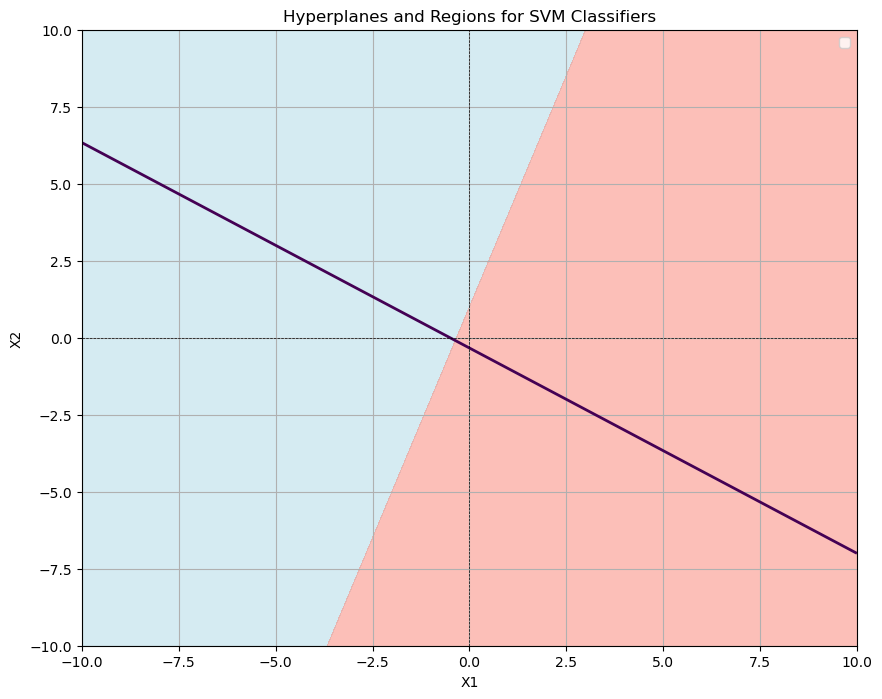

In [28]:
def plot_multiple_hyperplanes(hyperplanes, conditions, xlim=(-10, 10), ylim=(-10, 10)):
    x1 = np.arange(xlim[0], xlim[1] + 1, 1)
    x2 = np.arange(ylim[0], ylim[1] + 1, 1)
    X1, X2 = np.meshgrid(x1, x2)

    plt.figure(figsize=(10, 8))

    for i, (hyperplane_eq, condition_eq) in enumerate(zip(hyperplanes, conditions)):
        # Evaluate hyperplane and condition
        hyperplane = eval(hyperplane_eq)
        condition = eval(condition_eq)

        # Plot hyperplane
        plt.contour(X1, X2, hyperplane, levels=[0], linewidths=2, label=f'Hyperplane {i+1}: {hyperplane_eq} = 0')
        plt.contourf(X1, X2, condition, levels=[-100, 0], alpha=0.5, colors='lightblue')
        plt.contourf(X1, X2, condition, levels=[0, 100], alpha=0.5, colors='salmon')

    # Indicate the regions
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.title("Hyperplanes and Regions for SVM Classifiers")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid()
    plt.legend(loc='upper right')
    plt.show()

    
plot_multiple_hyperplanes(["1 + 2 * X1 + 3 * X2"], ["1 + 3 * X1 - X2"])


# Q5
Given two hyperplanes for SVM classifier 1 and SVM classifier 2, find the best hyperplane corresponding
to the classifier:
1. 5+2x1+5x2
2. 5+20x1+50x2 

Implement Python function program to draw the hyperplane that separates the two classes (without scikit-
learn library). Plot the scatter plot of the input features. Indicate the set of points for which
5+2*x1+ 5*x2 > 0 and 5+2*x1+ 5*x2 <0, 5+2*x1+ 5*x2 = 0 


On the same plot, Indicate the set of points for which
5+20*x1+50*x2 > 0 and 5+20*x1+50*x2 < 0, 5+20*x1+50*x2 =0.<br>
Find the slope and intercept. Solve manually in your Observation book. Compare your results with manual
results

/tmp/ipykernel_4818/1777184389.py:14: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, hyperplane, levels=[0], linewidths=2, label=f'Hyperplane {i+1}: {hyperplane_eq} = 0')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Hyperplane 1: Slope = -0.4, Y-Intercept = -1.0
Hyperplane 2: Slope = -0.4, Y-Intercept = -0.1


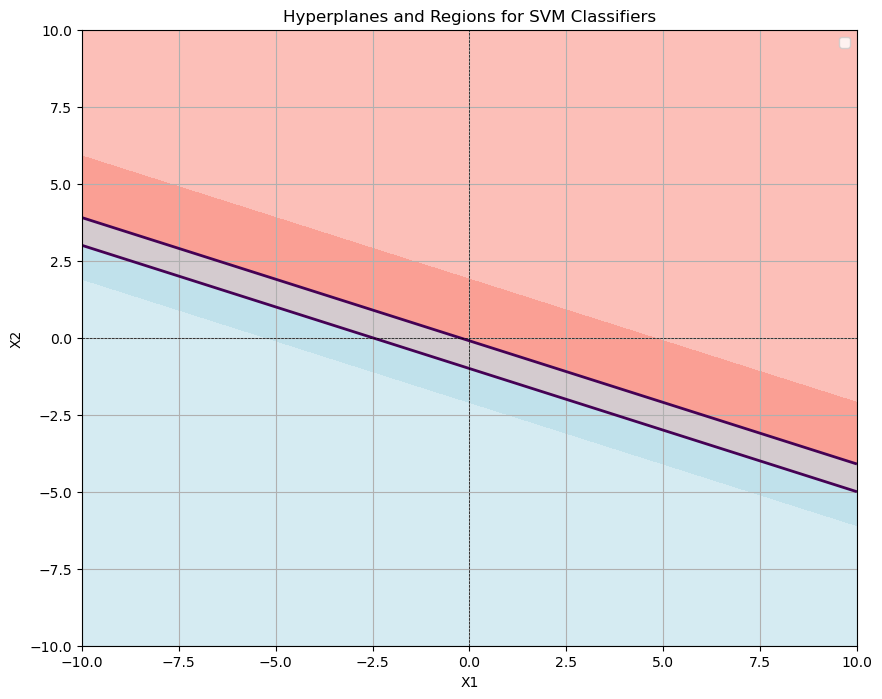

In [33]:
hyperplanes = ["5 + 2 * X1 + 5 * X2", "5 + 20 * X1 + 50 * X2"]
conditions = ["5 + 2 * X1 + 5 * X2", "5 + 20 * X1 + 50 * X2"]

print(f"Hyperplane 1: Slope = {-2/5}, Y-Intercept = {-5/5}")
print(f"Hyperplane 2: Slope = {-20/50}, Y-Intercept = {-5/50}")

plot_multiple_hyperplanes(hyperplanes, conditions)
